In [1]:
 library('tidyverse')
 options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Tiles

This is a dataset of otter skull morphology.

In [2]:
# uncomment the following:
 otter.data = read.csv('https://jcoliver.github.io/learn-r/data/otter-mandible-data.csv') %>%
     gather(characteristic, value, -species, -museum, -accession)

 otter.data %>% head

,species,museum,accession,characteristic,value
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,A. cinerea,AMNH,101458,m1,15.100
2,A. cinerea,AMNH,101461,m1,12.740
3,A. cinerea,AMNH,101466,m1,12.425
4,A. cinerea,AMNH,101635,m1,13.400
5,A. cinerea,AMNH,101459,m1,14.400
6,A. cinerea,AMNH,101462,m1,14.525


Make a bar chart of the museum column. What is this chart telling you?

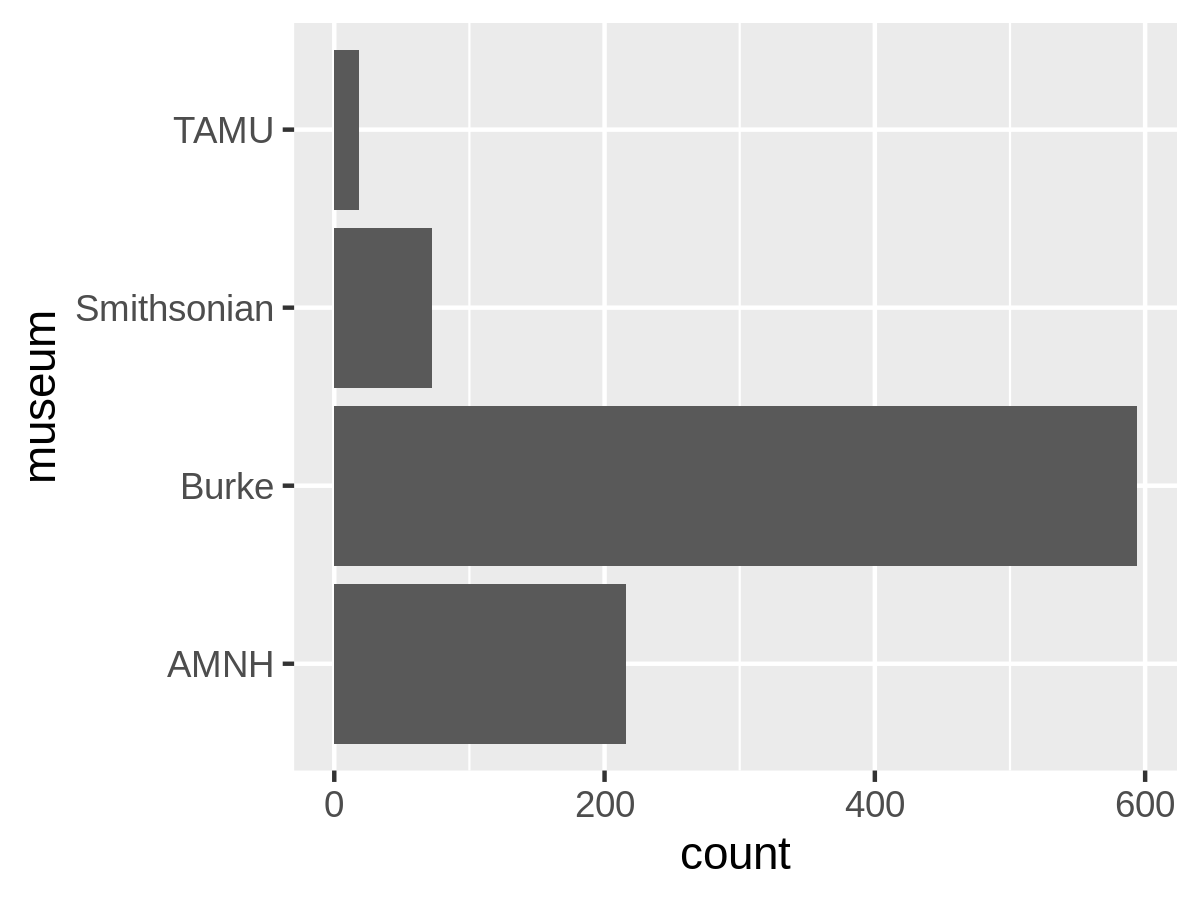

In [3]:
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

p = ggplot(otter.data, aes(y = museum))

p = p + geom_bar()

p

Make a heatmap of the data with `characteristic` on the x-axis and `species` on the y-axis.

In [4]:
# uncomment this to get a scaled version of the data:

 otter.data.scaled = otter.data %>%
     group_by(characteristic) %>%
     mutate(value.scaled = scales::rescale(value))

 otter.data.scaled %>% head

species,museum,accession,characteristic,value,value.scaled
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
A. cinerea,AMNH,101458,m1,15.100,0.27867699
A. cinerea,AMNH,101461,m1,12.740,0.11259676
A. cinerea,AMNH,101466,m1,12.425,0.09042928
A. cinerea,AMNH,101635,m1,13.400,0.15904293
A. cinerea,AMNH,101459,m1,14.400,0.22941590
A. cinerea,AMNH,101462,m1,14.525,0.23821253


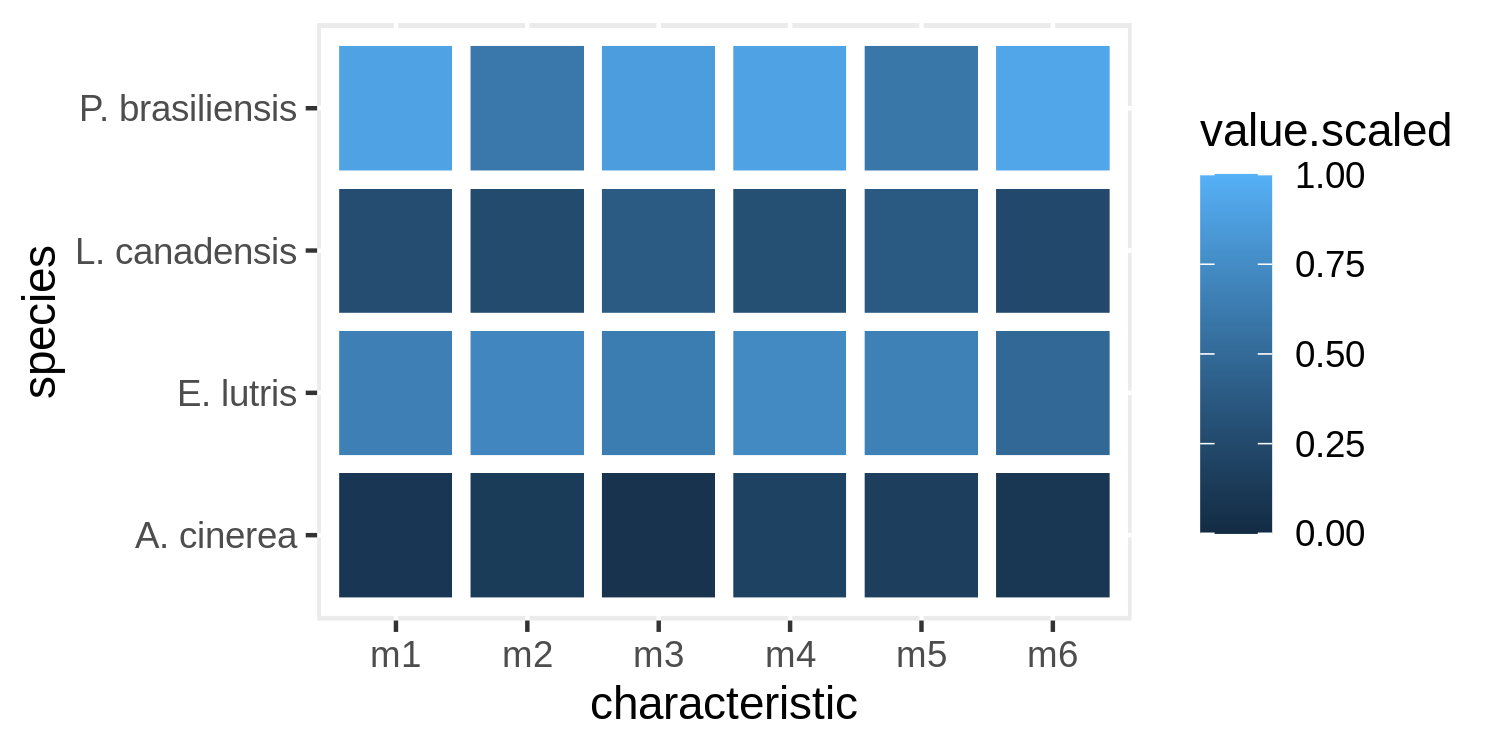

In [5]:
options(repr.plot.width=5, repr.plot.height=2.5, repr.plot.res = 300)

p = ggplot(otter.data.scaled, aes(x = characteristic, y = species, fill = value.scaled))

p = p + geom_tile(color = 'white', size = 2)
#color = white gives white border around tiles, size = 2 alters the size of the border around tiles

p

What can you do to make the chart more visually appealing?
- make the `color` white
- use `scale_fill_gradient(low = "white", high = "steelblue")`

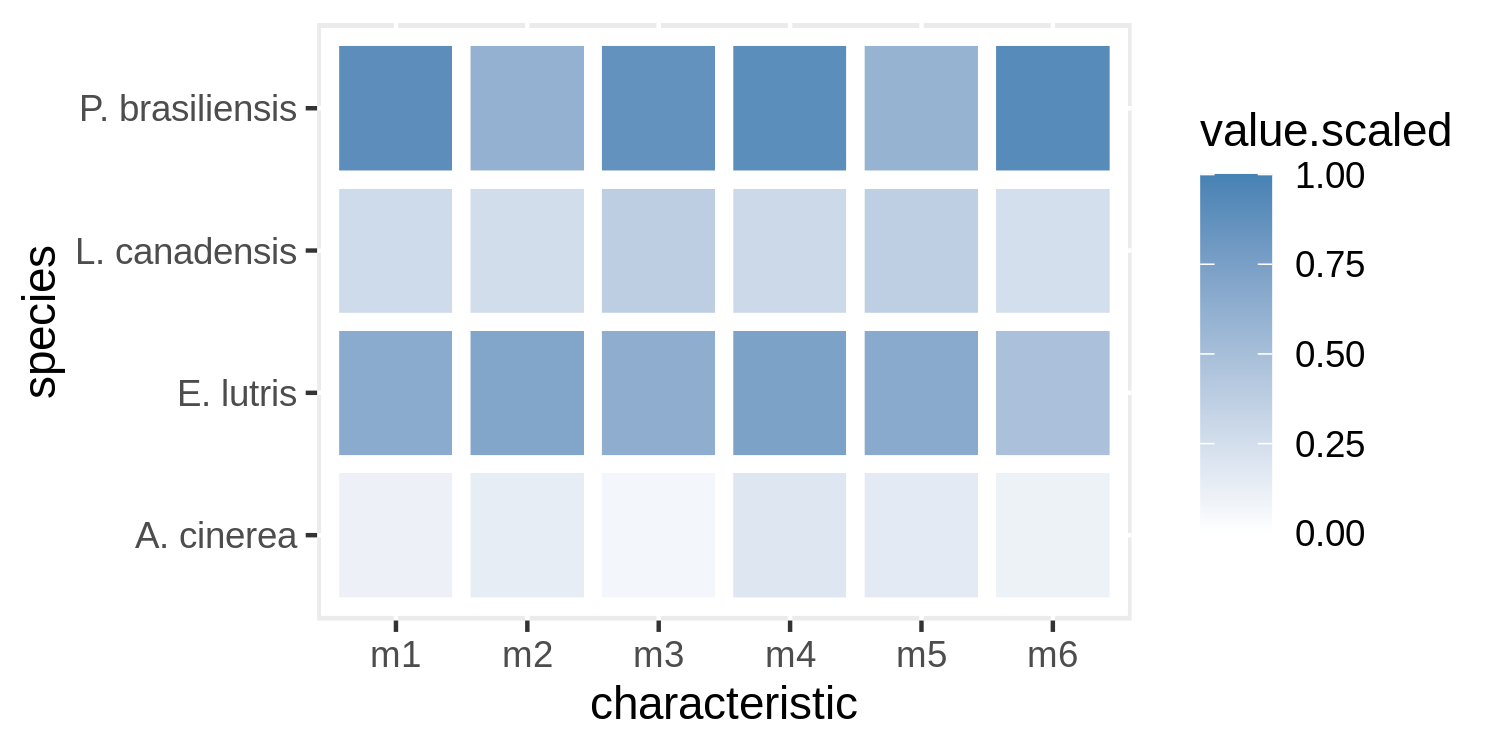

In [6]:
options(repr.plot.width=5, repr.plot.height=2.5, repr.plot.res = 300)

p = ggplot(otter.data.scaled, aes(x = characteristic, y = species, fill = value.scaled))

p = p + geom_tile(color = 'white', size = 2)

p = p + scale_fill_gradient(low = "white", high = "steelblue")

p


# Points with jitter

Let's stick with the otter data. We could also use a point+jitter plot to represent the data. Make a point+jitter plot below with species on the x-axis, value on the y-axis, and facet the chart by characteristic. 

Warning message:
“Removed 5 rows containing missing values (geom_point).”


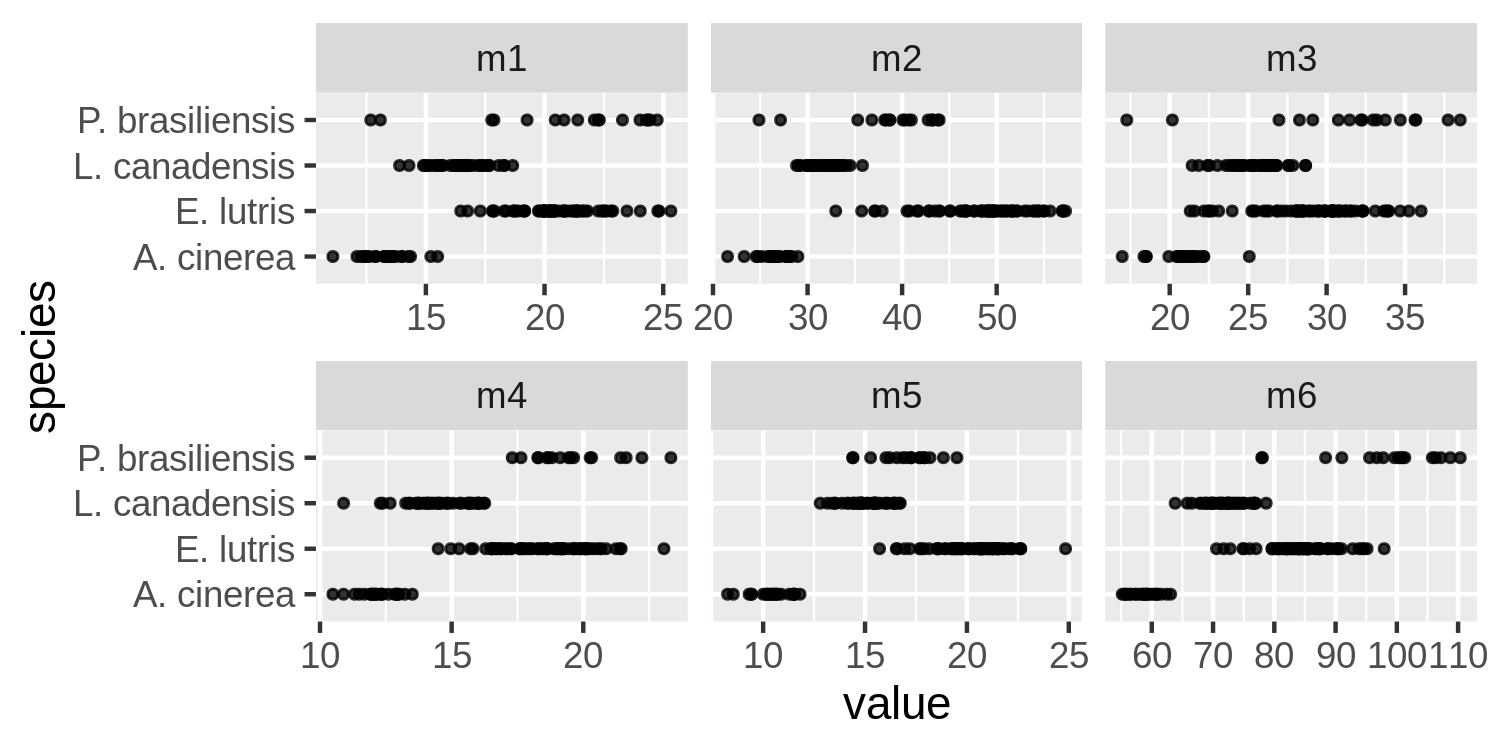

In [7]:
options(repr.plot.width=5, repr.plot.height=2.5, repr.plot.res = 300)

p = ggplot(otter.data, aes(y = species, x = value))

p = p + geom_point( size = 0.8, position = position_jitter(h = 0, w = 0.2), alpha = 0.8)
#position = position_jitter(h = 0, w = 0.15)

p = p + facet_wrap(~characteristic, scales = "free_x")
#adding the scales changes the range for each of the individual tables and not one range for all of them

p

Make the axis test legible by rotating the text 45 degrees.

Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”


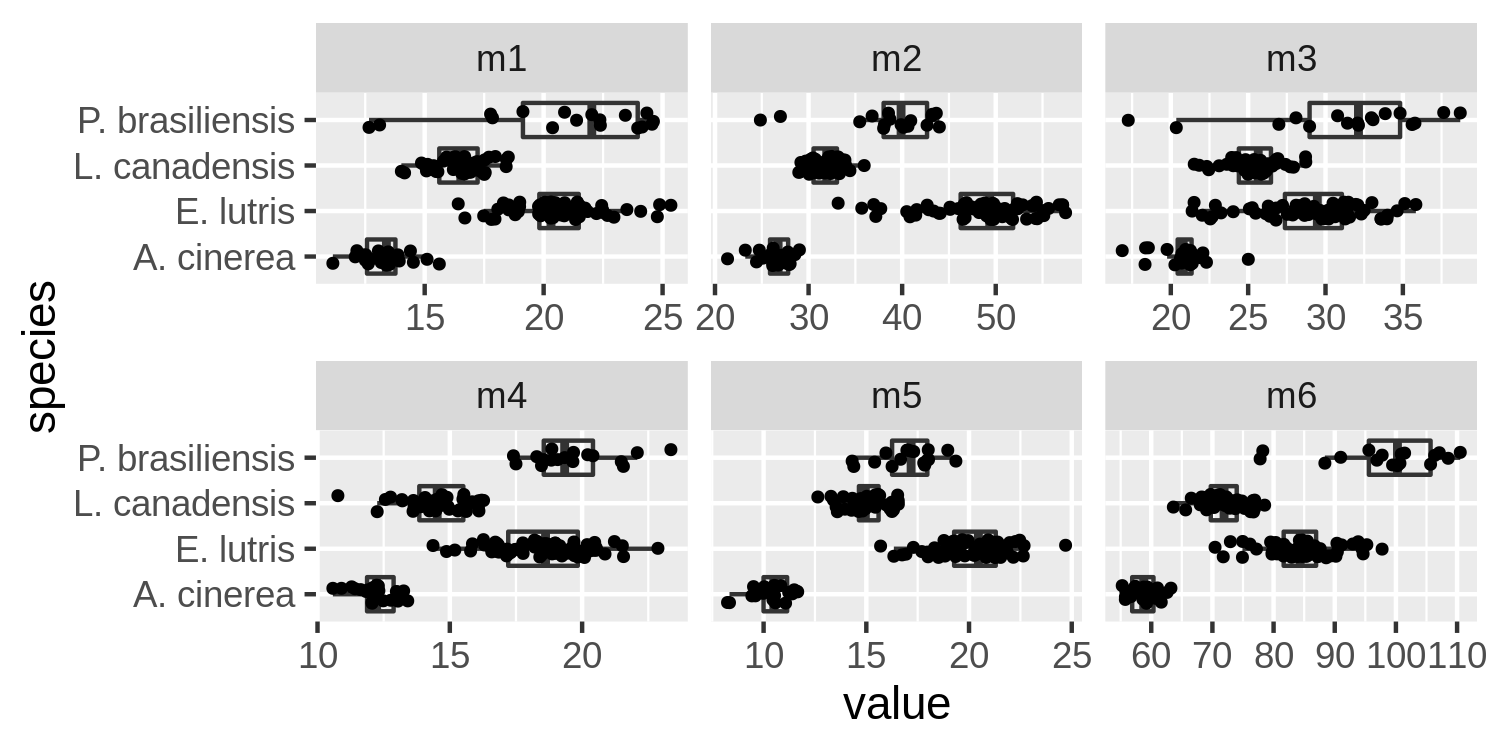

In [12]:
options(repr.plot.width=5, repr.plot.height=2.5, repr.plot.res = 300)

p = ggplot(otter.data, aes(x = species, y = value))

p = p + geom_boxplot(fill = NA, outlier.shape = NA) 

p = p + geom_point(size = 0.8, position = position_jitter(h = 0, w = 0.2))

p = p + facet_wrap(~characteristic, scales = "free_x")

p = p + coord_flip()
#this makes the axis legible in order to read the species, we corrected this issue in table above by changing the 
#x and y variables

p

What happens if you pass the argument `scales='free_y` to `facet_wrap`?

In [9]:
p = p + geom_boxplot(fill = NA, outlier.shape = NA) 
#adding fill = NA lalows us to see the points underneath where the box is

Do you prefer the heatmap or the point+jitter plot?